# Data Analysis 

In [1]:
#importing libraries 

import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from sklearn.ensemble import IsolationForest


In [2]:
#loading dataset

df = pd.read_csv('Boonsong Lekagul waterways readings.csv')

In [3]:
df.head(5)

,id,value,location,sample date,measure
0,2221,2.00,Boonsri,11-Jan-98,Water temperature
1,2223,9.10,Boonsri,11-Jan-98,Dissolved oxygen
2,2227,0.33,Boonsri,11-Jan-98,Ammonium
3,2228,0.01,Boonsri,11-Jan-98,Nitrites
4,2229,1.47,Boonsri,11-Jan-98,Nitrates


**Dimension of Dataset**

In [4]:
dimension = df.shape
print("Dataset Contains(No of rows , No of columns)",":",dimension)

Dataset Contains(No of rows , No of columns) : (136824, 5)


**Missing values**

In [5]:
df.isnull().sum()

id             0
value          0
location       0
sample date    0
measure        0
dtype: int64

In [6]:
#To use maxium rows in altair 
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [7]:
#Creating a copy to work with 
df_copy = df.copy()

In [8]:
#Datetime
df_copy['sample date'] = pd.to_datetime(df_copy['sample date'])
df_copy['Month'] = df_copy['sample date'].dt.month
df_copy['Year'] = df_copy['sample date'].dt.year

**Trends: changes over time**

C:\Users\Hp\AppData\Local\Temp\ipykernel_24564\1442438808.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_copy[df["measure"]=="Water temperature"], x='Month', y='value', hue='location',ci=None )


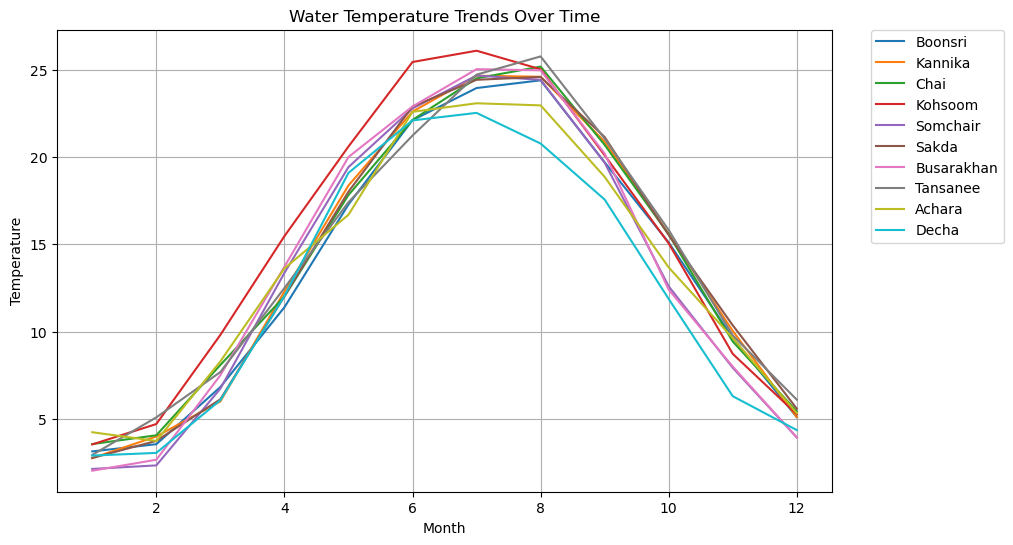

In [9]:
#Line graph for water temparature in different locations over the months using seaborn 
plt.figure(figsize=(10,6))
sns.lineplot(data=df_copy[df["measure"]=="Water temperature"], x='Month', y='value', hue='location',ci=None )
plt.title('Water Temperature Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

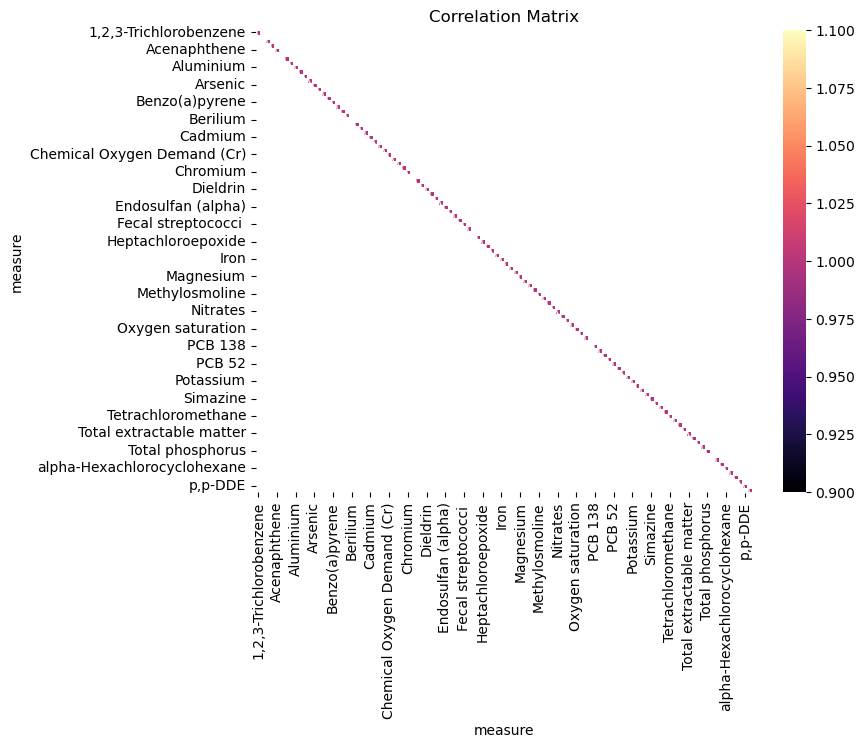

No high correlation pairs involving 'Water temperature' found.


In [10]:
#Finding the high correlation pairs (Other measures and water temperature)
pivot_df = df.pivot(columns='measure', values='value')

# Create a correlation matrix using Seaborn
corr_matrix = pivot_df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Identify high correlation pairs involving 'Temperature'
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns if abs(corr_matrix.loc['Water temperature', col2]) > 1 and col1 != 'Water temperature']

# Visualize the relationship using Altair
if high_corr_pairs:
    pair = high_corr_pairs[0]  # Select the first high correlation pair
    scatter_plot = alt.Chart(df).mark_point().encode(
        x='Water temperature',
        y=pair[1],
        tooltip=['Water temperature', pair[1]]
    ).properties(
        width=400,
        height=300
    ).interactive()

    plt.show()
else:
    print("No high correlation pairs involving 'Water temperature' found.")

C:\Users\Hp\AppData\Local\Temp\ipykernel_24564\3597170083.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_copy[df["measure"]=="Ammonium"], x='Month', y='value', hue='location',ci=None )


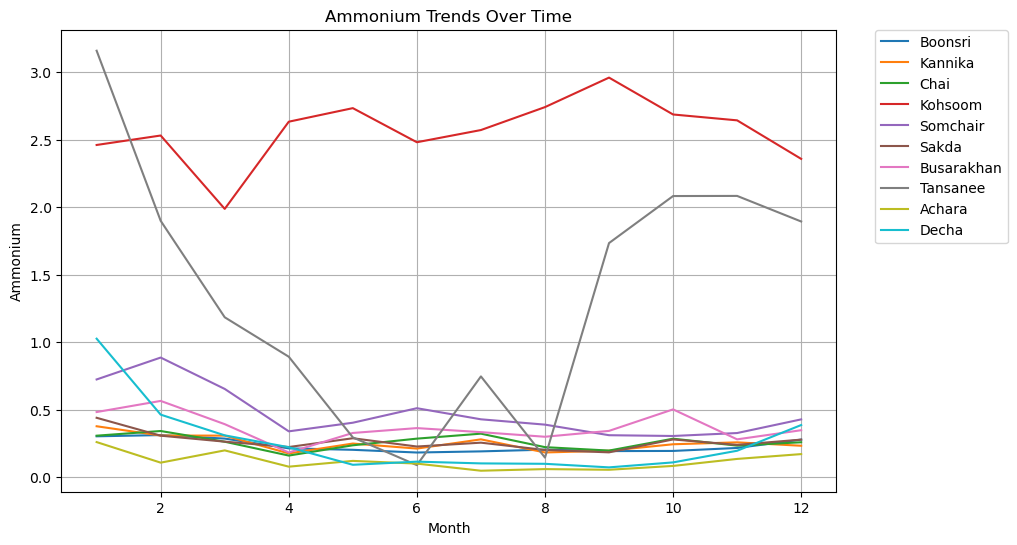

In [11]:
#Trend of Ammonium over time in different locations
plt.figure(figsize=(10,6))
sns.lineplot(data=df_copy[df["measure"]=="Ammonium"], x='Month', y='value', hue='location',ci=None )
plt.title('Ammonium Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Ammonium')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_24564\1340394820.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_copy[df["measure"]=="Endosulfan (beta)"], x='Month', y='value', hue='location',ci=None )


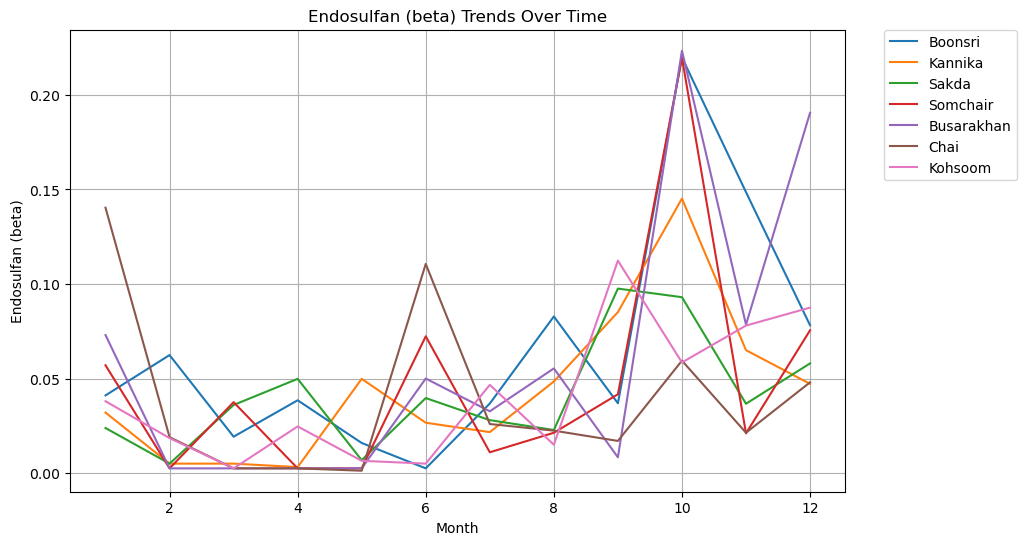

In [12]:
#Trend of Endosulfan (beta) over time in different locations
plt.figure(figsize=(10,6))
sns.lineplot(data=df_copy[df["measure"]=="Endosulfan (beta)"], x='Month', y='value', hue='location',ci=None )
plt.title('Endosulfan (beta) Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Endosulfan (beta)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

**Anomaly Detection**

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


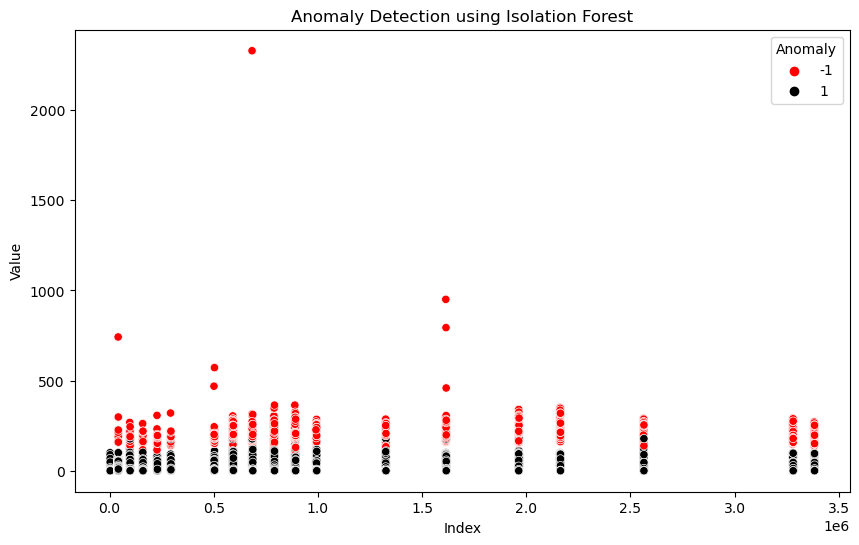

In [13]:
# Isolation Forest
model = IsolationForest(contamination=0.05)  # Contamination represents the expected proportion of anomalies
model.fit(df_copy[['value']])
df_copy['Anomaly'] = model.predict(df_copy[['value']])

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='id', y='value', hue='Anomaly', data=df_copy[df['location']=='Boonsri'], palette={-1: 'red', 1: 'black'})
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(title='Anomaly', loc='upper right')
plt.show()


In [14]:
df_copy.head(5)

,id,value,location,sample date,measure,Month,Year,Anomaly
0,2221,2.00,Boonsri,1998-01-11,Water temperature,1,1998,1
1,2223,9.10,Boonsri,1998-01-11,Dissolved oxygen,1,1998,1
2,2227,0.33,Boonsri,1998-01-11,Ammonium,1,1998,1
3,2228,0.01,Boonsri,1998-01-11,Nitrites,1,1998,1
4,2229,1.47,Boonsri,1998-01-11,Nitrates,1,1998,1


**Locations in Dataset**

In [15]:
num_of_loc = df.location.nunique()
print("Dataset contains",num_of_loc,"Different locations")

Dataset contains 10 Different locations


In [16]:
df.location.value_counts()

Boonsri       31314
Chai          31245
Kannika       22152
Sakda         21429
Kohsoom        7895
Somchair       7537
Busarakhan     7492
Achara         2855
Decha          2731
Tansanee       2174
Name: location, dtype: int64

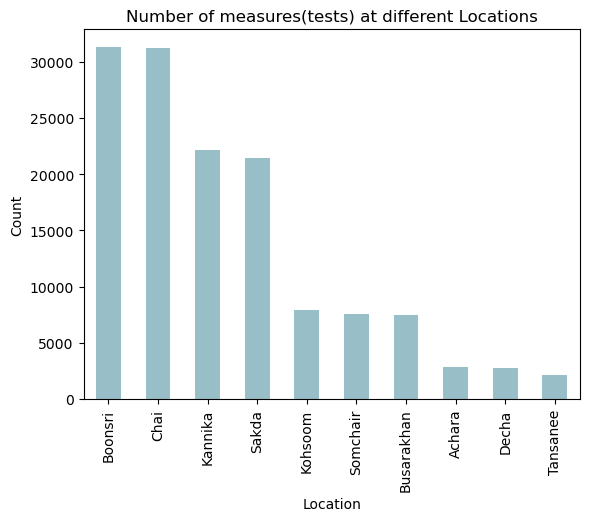

In [17]:
#bar chart for the number of measures at different locations
df.location.value_counts().plot.bar(color="#2787")
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Number of measures(tests) at different Locations")
plt.show()

**Measures**

In [18]:
tests = df.measure.nunique()
print("Dataset contains",tests,"Different measures.")

Dataset contains 106 Different measures.


In [19]:
df_copy.head(5)

,id,value,location,sample date,measure,Month,Year,Anomaly
0,2221,2.00,Boonsri,1998-01-11,Water temperature,1,1998,1
1,2223,9.10,Boonsri,1998-01-11,Dissolved oxygen,1,1998,1
2,2227,0.33,Boonsri,1998-01-11,Ammonium,1,1998,1
3,2228,0.01,Boonsri,1998-01-11,Nitrites,1,1998,1
4,2229,1.47,Boonsri,1998-01-11,Nitrates,1,1998,1


**Data Collection Frequency**

In [20]:
df_copy['sample date'] = pd.to_datetime(df_copy['sample date'])
df_copy.set_index('sample date', inplace=True)

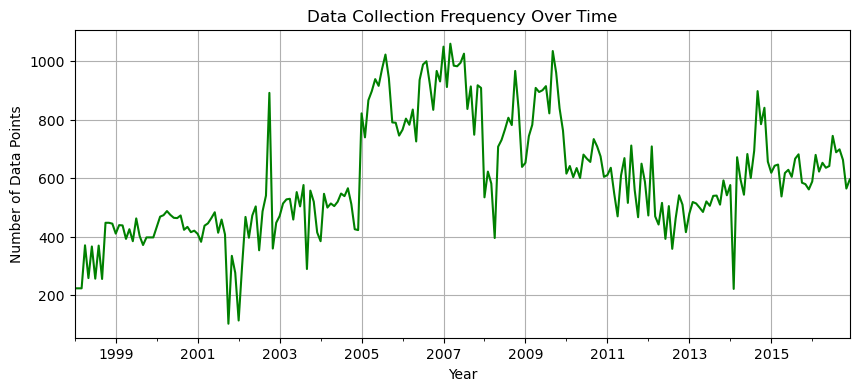

In [21]:
plt.figure(figsize=(10,4))
df_copy.resample('M').size().plot(color='green',grid=True)
plt.title('Data Collection Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.show()

**Data Collection over the time**

In [22]:
#Average (Data Collection) Frequency 
avg_freq = df_copy.resample('M').size().mean()
print(f'Average collection frequency per month: {avg_freq}')

Average collection frequency per month: 600.1052631578947


In [23]:
#Number of data points (yearly)
yearly_avg = df_copy.resample('Y').size().mean(level=0)
print(yearly_avg)

sample date
1998-12-31     3893.0
1999-12-31     4926.0
2000-12-31     5436.0
2001-12-31     4621.0
2002-12-31     5337.0
2003-12-31     5919.0
2004-12-31     5985.0
2005-12-31    10448.0
2006-12-31    10493.0
2007-12-31    11338.0
2008-12-31     8373.0
2009-12-31    10220.0
2010-12-31     7825.0
2011-12-31     7037.0
2012-12-31     5798.0
2013-12-31     6250.0
2014-12-31     7770.0
2015-12-31     7375.0
2016-12-31     7780.0
Freq: A-DEC, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_24564\796642442.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  yearly_avg = df_copy.resample('Y').size().mean(level=0)


In [24]:
#Number of years
df_copy.Year.nunique()

19

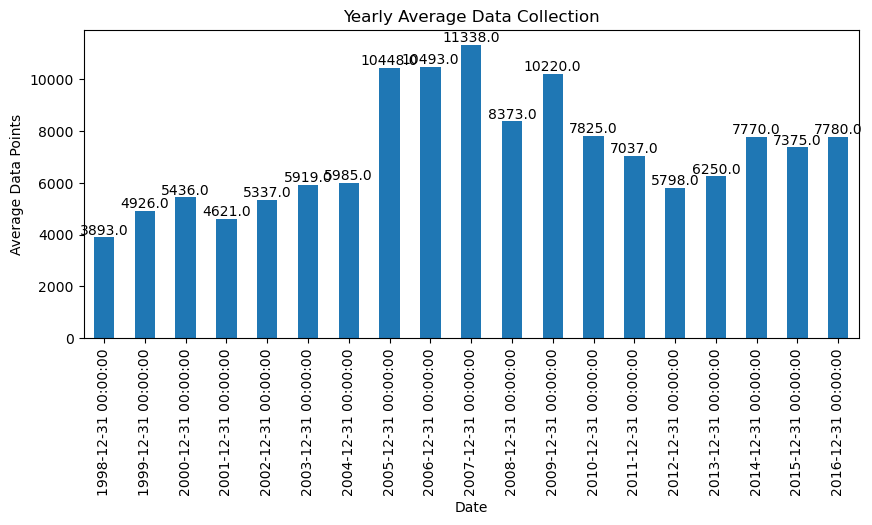

In [25]:
#Bar chart, Data collection over the years
plt.figure(figsize=(10,4))
yearly_avg.plot(kind='bar')
for i, v in enumerate(yearly_avg):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.title('Yearly Average Data Collection')
plt.xlabel('Date')
plt.ylabel('Average Data Points')
plt.show()

**Advance Altair**

In [26]:
#Using Advance altair (Horizontal concatenate) water temperature and Nitrites at different locations

df_tem = pd.DataFrame(df[df["measure"]=="Water temperature"][df['value']>=30])
df_tem = df_tem.rename(columns=({'value':'temperature'}))

chart1 = alt.Chart(df_tem).mark_circle(size=200).encode(
    x='temperature:Q',
    y='location:N',
color='location',text='location:N',  # Used text encoding to display pointer values
    tooltip=['temperature:Q', 'location:N']).properties(title='Scatter Plot of water temperature in different locations',
    width=350,  # set the width
    height=150  # set the height
)

df_tem = pd.DataFrame(df[df["measure"]=="Nitrites"][df['value']>=0.5])
df_tem = df_tem.rename(columns=({'value':'Nitrites_value'}))

chart2 = alt.Chart(df_tem).mark_circle(size=200).encode(
    x='Nitrites_value:Q',
    y='location:N',
color='location',text='location:N',  # Used text encoding to display pointer values
    tooltip=['Nitrites_value:Q', 'location:N']).properties(title='Scatter Plot of Nitrites value in different locations',
    width=350,  # set the width
    height=150  # set the height
)

# Concatenate horizontally
concatenated_chart = alt.hconcat(chart1, chart2)

# Show the concatenated chart
concatenated_chart


C:\Users\Hp\AppData\Local\Temp\ipykernel_24564\3347780246.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tem = pd.DataFrame(df[df["measure"]=="Water temperature"][df['value']>=30])
C:\Users\Hp\AppData\Local\Temp\ipykernel_24564\3347780246.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tem = pd.DataFrame(df[df["measure"]=="Nitrites"][df['value']>=0.5])


alt.HConcatChart(...)

In [27]:
#Using Advance altair (Vertical concatenate) Orthophosphate-phosphorus and Ammonium at different locations

df_tem = pd.DataFrame(df[df["measure"]=="Ammonium"][df['value']>=5])
df_tem = df_tem.rename(columns=({'value':'Ammoniums_value'}))

chart3 = alt.Chart(df_tem).mark_circle(size=100).encode(
    x='Ammoniums_value:Q',
    y='location:N',
color='location',text='location:N',  # Used text encoding to display pointer values
    tooltip=['Ammoniums_value:Q', 'location:N']).properties(title='Scatter Plot of Ammoniums value in different locations',
    width=700,  # set the width
    height=300  # set the height
)

df_tem = pd.DataFrame(df[df["measure"]=="Orthophosphate-phosphorus"][df['value']>=0.8])
df_tem = df_tem.rename(columns=({'value':'Orthophosphate-phosphorus_value'}))

chart4 = alt.Chart(df_tem).mark_circle(size=200).encode(
    x='Orthophosphate-phosphorus_value:Q',
    y='location:N',
color='location',text='location:N',  # Used text encoding to display pointer values
    tooltip=['Orthophosphate-phosphorus_value:Q', 'location:N']).properties(title='Scatter Plot of Orthophosphate-phosphorus value in different locations',
    width=700,  # set the width
    height=300  # set the height
)

# Concatenate horizontally
concatenated_chart = alt.vconcat(chart3, chart4)

# Show the concatenated chart
concatenated_chart

C:\Users\Hp\AppData\Local\Temp\ipykernel_24564\2799922362.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tem = pd.DataFrame(df[df["measure"]=="Ammonium"][df['value']>=5])
C:\Users\Hp\AppData\Local\Temp\ipykernel_24564\2799922362.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tem = pd.DataFrame(df[df["measure"]=="Orthophosphate-phosphorus"][df['value']>=0.8])


alt.VConcatChart(...)

In [28]:
#Using Advance altair (Interactive features) Orthophosphate-phosphorus and Ammonium at different locations

df_tem = pd.DataFrame(df[df["measure"]=="Total phosphorus"][df['value']>=1])
df_tem = df_tem.rename(columns=({'value':'Total phosphorus_value'}))

alt.Chart(df_tem).mark_circle(size=150).encode(
    x='Total phosphorus_value:Q',
    y='location:N',
color='location',text='location:N',  # Used text encoding to display pointer values
    tooltip=['Total phosphorus_value:Q', 'location:N']).properties(title='Scatter Plot of Total phosphorus value in different locations',
    width=700,  # set the width
    height=300  # set the height
).interactive()

C:\Users\Hp\AppData\Local\Temp\ipykernel_24564\2682880616.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tem = pd.DataFrame(df[df["measure"]=="Total phosphorus"][df['value']>=1])


alt.Chart(...)